## SciPy를 이용한 확률 분포 분석

- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지다. SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공한다.
#### 확률 분포 객체¶
- SciPy에서 확률 분포 기능을 사용하려면 우선 해당 확률 분포에 대한 확률 분포 객체라는 것을 생성한 후에 이 객체의 메서드를 호출한다.
- 확률 분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다.
```
종류	이름	확률 분포
이산	bernoulli	베르누이 분포
이산	binom	이항 분포
이산	multinomial	다항 분포
연속	uniform	균일 분포
연속	norm	가우시안 정규 분포
연속	beta	베타 분포
연속	gamma	감마 분포
연속	t	스튜던트 t 분포
연속	chi2	카이 제곱 분포
연속	f	F 분포
연속	dirichlet	디리클리 분포
연속	multivariate_normal	다변수 가우시안 정규 분포
```

이 명령들은 모두 scipy.stats 서브패키지에 포함되어 있으므로 명령 앞에 서브패키지 이름과 마침표를 붙여야 한다. 예를 들어 가우시안 정규 분포 객체는 다음과 같이 생성한다.

In [3]:
%matplotlib inline
import scipy as sp

In [6]:
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

#### 모수 지정¶
확률 분포 객체를 생성할 때는 분포의 형상을 구체적으로 지정하는 모수(parameter)를 인수로 지정해 주어야 한다. 각 확률 분포마다 지정해 주어야 할 모수가 다르므로 자세한 설명은 문서를 참조하여야 하지만 대부분 다음과 같은 모수들을 공통적으로 가진다.

    인수	의미
    loc	일반적으로 분포의 기댓값
    scale	일반적으로 분포의 표준편차
    
예를 들어 기댓값이 1이고 표준 편차가 2인 정규 분포 객체는 다음과 같이 생성한다.

    rv = sp.stats.norm(loc=1, scale=2)

#### 확률 분포 메서드¶
확률 분포 객체가 가지는 메서드는 다음과 같다.

    메서드	기능
    pdf	확률 밀도 함수 (probability density function) : 이론적 분포
    pmf	확률 질량 함수 (probability mass function) : 이론적 분포
    cdf	누적 분포 함수 (cumulative distribution function) : 이론적 분포
    rvs	랜덤 샘플 생성 (random variable sampling) : 표본 뽑을 때

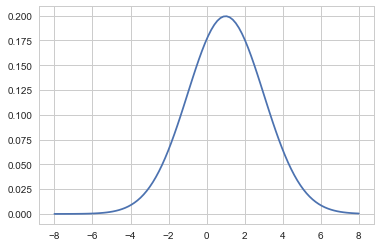

In [16]:
xx = np.linspace(-8, 8, 100)
rv = sp.stats.norm(loc=1, scale=2)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

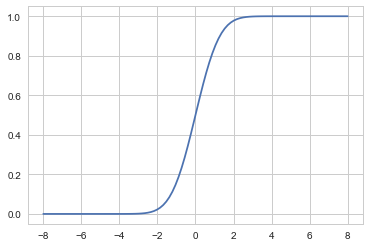

In [17]:
xx = np.linspace(-8, 8, 100)
rv = sp.stats.norm()
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.show()

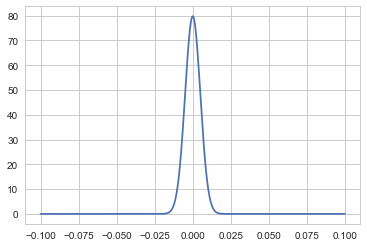

In [19]:
x = np.linspace(-0.1, 0.1, 1000)
rv = sp.stats.norm(loc=0, scale=0.005)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.show()

#### 랜덤 샘플 생성¶
랜덤 샘플을 만들때는 rvs 메서드를 사용한다. 이 메서드에서 받는 인수는 다음과 같다.

    인수	의미
    size	샘플 생성시 생성될 샘플의 크기
    random_state	샘플 생성시 사용되는 시드(seed)값

In [33]:
rv.rvs(size=(3,5), random_state=0)

array([[ 0.61741832,  0.14005502,  0.34255829,  0.78431262,  0.6536453 ],
       [-0.34204726,  0.33253095, -0.05297502, -0.0361266 ,  0.14370948],
       [ 0.05041525,  0.50899573,  0.2663632 ,  0.04258626,  0.15535213]])

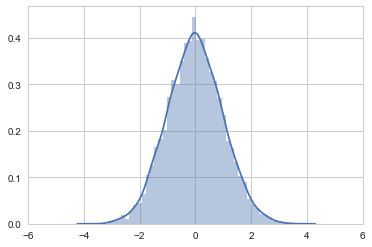

In [26]:
rv = sp.stats.norm()
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-6,6)
plt.show()

In [29]:
theta = 0.5
rv_b = sp.stats.bernoulli(theta)

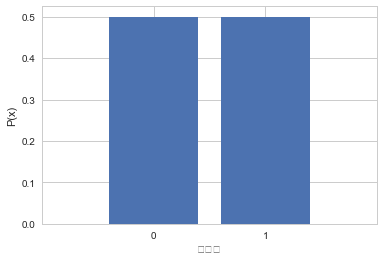

In [30]:
x = [0, 1]
plt.bar(x, rv_b.pmf(x))
plt.xlim(-1, 2)
plt.xticks([0, 1])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.show()

In [31]:
x1 = rv_b.rvs(100, random_state=0)
x1.mean(), x1.var().round(3), x1

(0.49,
 0.25,
 array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]))

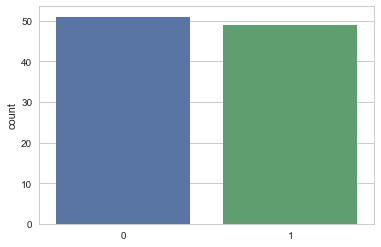

In [32]:
sns.countplot(x1)
plt.show()

In [37]:
y = np.bincount(x1)  # np.array의 성분(순서대로 배열 후)이 나온 횟수
y

array([51, 49], dtype=int64)

In [45]:
df1 = pd.DataFrame({"이론":rv_b.pmf(x), "시뮬레이션":y}).stack().reset_index()
df1.columns = ["sample", "유형", "rate"]
df1

,sample,유형,rate
0,0,시뮬레이션,51.0
1,0,이론,0.5
2,1,시뮬레이션,49.0
3,1,이론,0.5


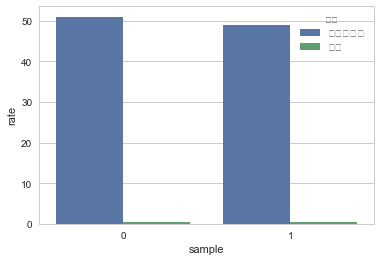

In [50]:
sns.barplot(data=df1, x='sample', y='rate', hue="유형")
plt.show()

##### 연습 문제 1.
rvs 명령으로 N개의 정규 분포 샘플 데이터를 생성하고 이 샘플 데이터로부터 샘플 평균과 비편향 샘플 분산을 구한다. 이 값이 인수로 넣은 기댓값과 분산과 비슷한지 비교하라.

1. N =10인 경우
2. N =10000인 경우

In [61]:
#1. N = 10
N = 10
x = sp.stats.norm(loc = 3, scale = 2)
rv = x.rvs(N)
rv.mean(), rv.var()

(3.155196544341524, 5.253865750940254)

In [59]:
#1. N = 10000
N = 10000
x = sp.stats.norm(loc = 3, scale = 2)
rv = x.rvs(N)
rv.mean(), rv.var()

(2.9959607428131196, 4.023692048686834)